In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [2]:
# Load CSV
df = pd.read_csv("E:\PRAXIS\TERM 1\FOML\grid search\insurance (1).csv")

# Quick look
print(df.shape)
df.head()


(1338, 7)


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Sakshi Deshmukh\AppData\Local\Temp\ipykernel_29852\2024421404.py:2: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("E:\PRAXIS\TERM 1\FOML\grid search\insurance (1).csv")


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Age Distribution

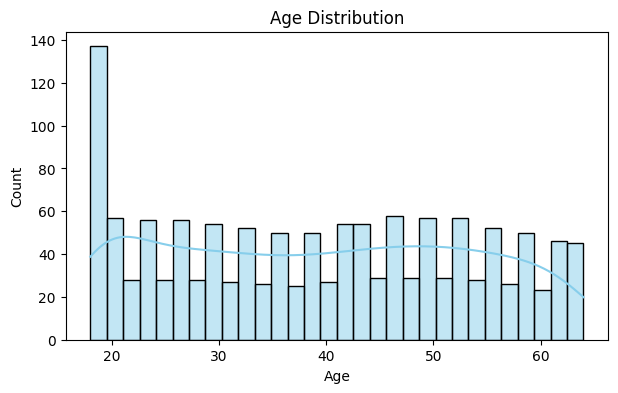

In [20]:
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Gender Count

C:\Users\Sakshi Deshmukh\AppData\Local\Temp\ipykernel_29852\3581298620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


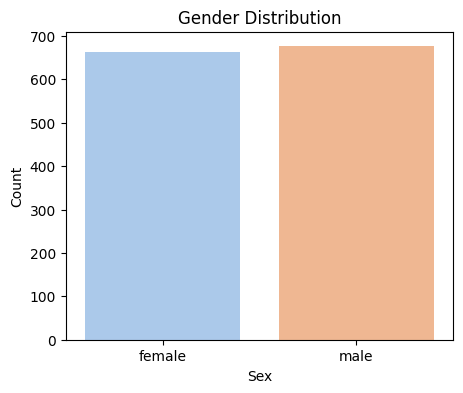

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


Smoker vs Non-Smoker Count

C:\Users\Sakshi Deshmukh\AppData\Local\Temp\ipykernel_29852\137563690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='muted')


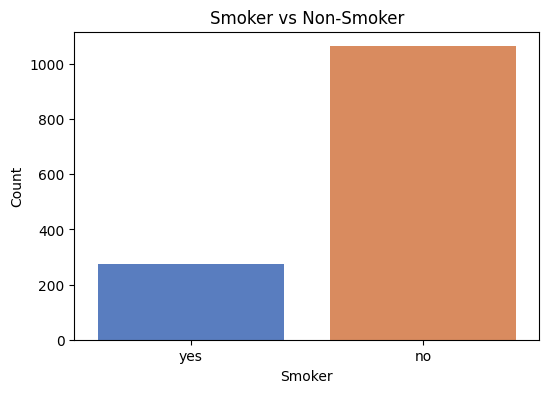

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=df, palette='muted')
plt.title('Smoker vs Non-Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


Region-wise Distribution

C:\Users\Sakshi Deshmukh\AppData\Local\Temp\ipykernel_29852\1579555492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='cool')


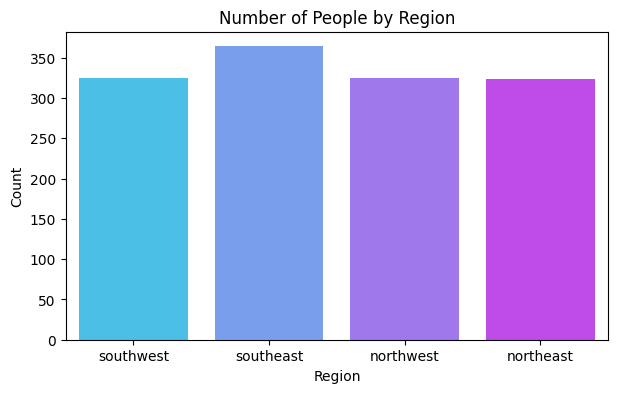

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(x='region', data=df, palette='cool')
plt.title('Number of People by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


BMI vs Charges (with Smoker hue)

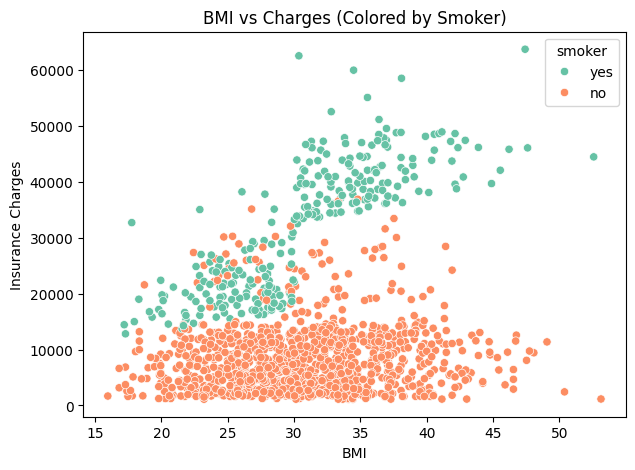

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set2')
plt.title('BMI vs Charges (Colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()


Age vs Charges 

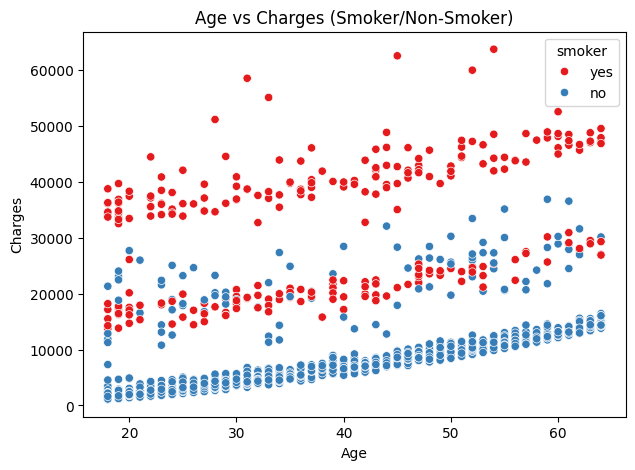

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='Set1')
plt.title('Age vs Charges (Smoker/Non-Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Charges by smoker

C:\Users\Sakshi Deshmukh\AppData\Local\Temp\ipykernel_29852\2664319093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='husl')


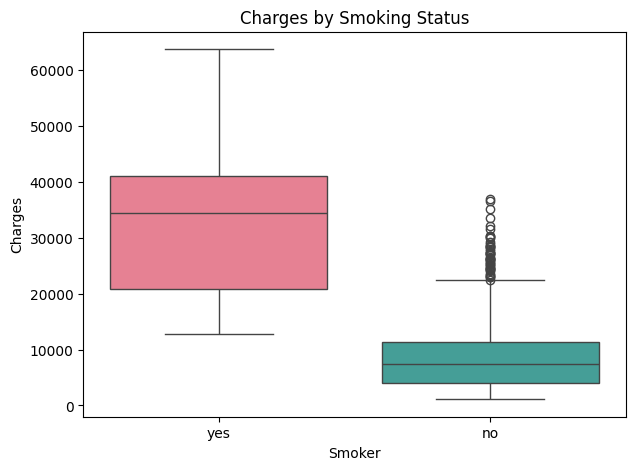

In [26]:
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker', y='charges', data=df, palette='husl')
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Charges by Region

C:\Users\Sakshi Deshmukh\AppData\Local\Temp\ipykernel_29852\1033172441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='coolwarm')


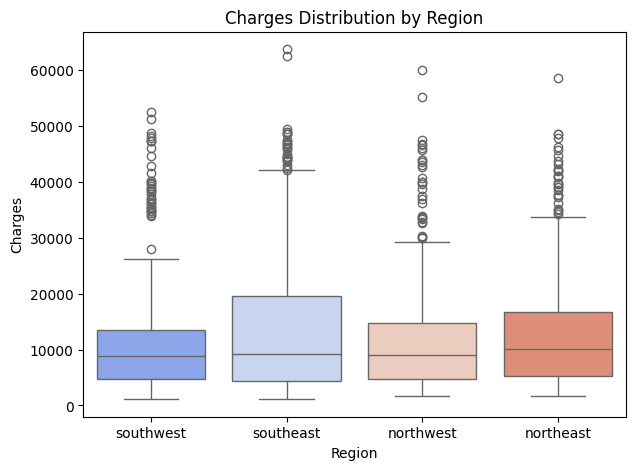

In [28]:
plt.figure(figsize=(7,5))
sns.boxplot(x='region', y='charges', data=df, palette='coolwarm')
plt.title('Charges Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

In [4]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [5]:
categorical_cols = ["sex", "smoker", "region"]
numerical_cols = ["age", "bmi", "children"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=80)

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ],
    remainder="passthrough"
)

In [8]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=80))
])


In [9]:
param_grid = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [None, 5, 10, 20],
    "regressor__min_samples_split": [2, 5, 10]
}

In [10]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_mean_absolute_percentage_error",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,Pipeline(step...m_state=80))])
,param_grid,"{'regressor__max_depth': [None, 5, ...], 'regressor__min_samples_split': [2, 5, ...], 'regressor__n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_absolute_percentage_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...)]"


In [11]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}


In [12]:
y_pred = grid_search.predict(X_test)

# Metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MAPE: {mape:.4f}")
print(f"Test R²: {r2:.4f}")


Test MAPE: 0.3109
Test R²: 0.8699


In [13]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
results.head(10)


,Actual,Predicted
240,38511.62830,37413.274302
651,10579.71100,13843.968554
761,2416.95500,4874.089859
836,4402.23300,5876.288273
1147,2261.56880,3167.721669
136,1261.44200,3009.051363
1234,8515.75870,10171.365819
53,37742.57570,39775.475547
463,11165.41765,12699.076871
360,10043.24900,10661.028879
